In [2]:
## Thư viện
import  matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
from numpy               import mean, median
from scipy               import stats

from sklearn             import linear_model

In [ ]:
# 2.1) Thể hiện những thông tin của dữ liệu. Vẽ biểu đồ phân phối tần số điểm thi của các môn.

In [3]:
iq = pd.read_excel('../Data/IQ4.xls')
iq.drop('stt', axis=1, inplace=True)
iq.head()

,diem_1,diem_2,diem_3,diem_4,IQ
0,8,2.0,7.0,7,68
1,8,8.4,6.4,8,137
2,7,7.6,7.8,8,135
3,8,3.0,2.5,6,79
4,8,4.4,3.8,6,107


In [3]:
iq.corr()

,diem_1,diem_2,diem_3,diem_4,IQ
diem_1,1.000000,0.026545,0.283750,-0.084275,-0.088168
diem_2,0.026545,1.000000,0.544166,0.834065,0.872419
diem_3,0.283750,0.544166,1.000000,0.441337,0.471522
diem_4,-0.084275,0.834065,0.441337,1.000000,0.622977
IQ,-0.088168,0.872419,0.471522,0.622977,1.000000


In [4]:
iq.describe()

,stt,diem_1,diem_2,diem_3,diem_4,IQ
count,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,7.600000,5.920000,6.86000,7.000000,115.200000
std,5.91608,0.680557,2.214212,1.79338,0.917663,22.279563
min,1.00000,6.000000,2.000000,2.50000,6.000000,68.000000
25%,5.75000,7.000000,4.400000,6.07500,6.000000,109.250000
50%,10.50000,8.000000,5.800000,7.10000,7.000000,120.000000
75%,15.25000,8.000000,7.700000,8.17500,8.000000,134.250000
max,20.00000,8.000000,9.600000,9.20000,9.000000,140.000000


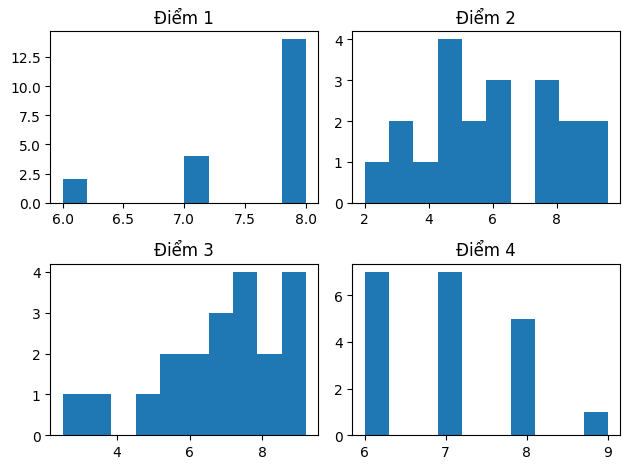

In [3]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(iq['diem_1']) #dòng 0, cột 0
axes[0, 0].set_title('Điểm 1')
axes[0, 1].hist(iq['diem_2']) # dòng 0, cột 1
axes[0, 1].set_title('Điểm 2')
axes[1, 0].hist(iq['diem_3'])
axes[1, 0].set_title('Điểm 3')
axes[1, 1].hist(iq['diem_4'])
axes[1, 1].set_title('Điểm 4')
plt.tight_layout()  # Đảm bảo các biểu đồ không bị trùng lên nhau
plt.show()

# 2.2) Dùng các hàm để tính các giá trị thống kê cơ bản của chỉ số IQ và điểm thi của các môn.

In [3]:
def printBaseStatiѕtic(arr):
    print('====================')
    print('Mean    =', mean(arr))
    print('MIN     =', min(arr))
    print('MAX     =', max(arr))
    print('Median  =', median(arr))
    print('STD  =', np.std(arr))
    x_mod = stats.mode(arr)
    print('Gia tri xuat hien nhieu nhat = %d' %x_mod[0], 'so lan xuat hien %d' %x_mod[1])

In [4]:
printBaseStatiѕtic(iq['diem_1'])
printBaseStatiѕtic(iq['diem_2'])
printBaseStatiѕtic(iq['diem_3'])
printBaseStatiѕtic(iq['diem_4'])
printBaseStatiѕtic(iq['IQ'])

Mean    = 7.6
MIN     = 6
MAX     = 8
Median  = 8.0
STD  = 0.6633249580710799
Gia tri xuat hien nhieu nhat = 8 so lan xuat hien 14
Mean    = 5.92
MIN     = 2.0
MAX     = 9.6
Median  = 5.8
STD  = 2.1581473536345936
Gia tri xuat hien nhieu nhat = 4 so lan xuat hien 2
Mean    = 6.859999999999999
MIN     = 2.5
MAX     = 9.2
Median  = 7.1
STD  = 1.7479702514631077
Gia tri xuat hien nhieu nhat = 7 so lan xuat hien 2
Mean    = 7.0
MIN     = 6
MAX     = 9
Median  = 7.0
STD  = 0.8944271909999159
Gia tri xuat hien nhieu nhat = 6 so lan xuat hien 7
Mean    = 115.2
MIN     = 68
MAX     = 140
Median  = 120.0
STD  = 21.715432300555292
Gia tri xuat hien nhieu nhat = 110 so lan xuat hien 2


2.3) Xác định outlier(s), nếu có, của chỉ số IQ và điểm thi của các môn dựa trên quy tắc 3-Sigma.

In [26]:
## Dùng z-score để xác định outliers của điểm 1, 2, 3, 4, IQ bằng qui tắc 3- Sigma

def printOutliers(arr):
    z_score = stats.zscore(arr) # tính zscore ( Standard Score - khoảng cách giữa một giá trị dữ liệu cụ thể và trung bình của tập dữ liệu)
    outliers = z_score[(z_score < -1) | (z_score > 1)] 
    print(type(outliers))
    print(outliers)
    print('Các vị trí outliers:', outliers.index.tolist()) # các vị trí có outliers
    print("Giá trị outliers   :",  (arr[outliers.index.tolist()].values))



In [27]:
printOutliers(iq['diem_1'])

<class 'pandas.core.series.Series'>
8    -2.412091
18   -2.412091
Name: diem_1, dtype: float64
Các vị trí outliers: [8, 18]
Giá trị outliers   : [6 6]


2.4) Chọn điểm thi của một trong các môn để làm cơ sở cho việc dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính bằng Gradient Descent và bằng ma trận giả nghịch đảo. Trực quan hóa dữ liệu và giải thích nguyên nhân của sự lựa chọn.


In [29]:
#Viết hàm

def gradient_descent(input, y):
    xHat = np.c_[np.ones(input.size),input]
    # print(xHat)
    # print(y)
    regr = linear_model.LinearRegression(fit_intercept = False)
    regr.fit(xHat, y)
    ## Phương trình đường thẳng (không gian 2D): y = m.x + b
    slope = regr.coef_.flatten()[1]
    bias  = regr.coef_.flatten()[0]
    print('Phương trình hồi quy tuyến tính bằng PP Gradient Descent:')
    print('   y = (', slope, ') * X + (', bias, ')')

def matran_nghichdao(input, y):
    xHat = np.c_[np.ones(input.size),input]
    ## Các ma trận
    A = xHat.T @ xHat
    b = xHat.T @ y

    ## Vector tham số
    w = np.linalg.pinv(A) @ b

    slope3 = w[1]
    bias3  = w[0]
    print('Phương trình hồi quy tuyến tính bằng phương pháp ma trận nghịch đảo:')
    print('   IQ = (', slope3, ') * diem + (', bias3, ')')


In [28]:
iq.corr()

,diem_1,diem_2,diem_3,diem_4,IQ
diem_1,1.000000,0.026545,0.283750,-0.084275,-0.088168
diem_2,0.026545,1.000000,0.544166,0.834065,0.872419
diem_3,0.283750,0.544166,1.000000,0.441337,0.471522
diem_4,-0.084275,0.834065,0.441337,1.000000,0.622977
IQ,-0.088168,0.872419,0.471522,0.622977,1.000000


In [30]:
matran_nghichdao(iq['diem_2'], iq['IQ'])

Phương trình hồi quy tuyến tính bằng phương pháp ma trận nghịch đảo:
   IQ = ( 8.778340776365548 ) * diem + ( 63.232222603916036 )


#2.5) DựđoáncácchỉsốIQtươngứngvớix{0.5,1.0,1.5,2.0,...,9.0,9.5,10}

In [31]:
## Các giá trị bách phân vị
percentiles = np.array([0,5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60, 65, 75, 80, 85, 90, 95, 100])  # trục tung
x = np.percentile(iq['IQ'], percentiles)       # trục hoành
x

array([ 68.  ,  73.7 ,  78.5 ,  86.65, 103.2 , 109.25, 110.  , 111.95,
       114.2 , 117.75, 120.  , 120.45, 123.8 , 128.  , 134.25, 135.4 ,
       137.15, 138.1 , 139.05, 140.  ])